In [26]:
from models.model import vanilla_nn
from datasets.synth import oneD_linear

import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from tqdm.notebook import tqdm
# from tqdm import tqdm

import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

In [27]:
gpu_num = 0

In [28]:
cuda_device = "cuda:{}".format(gpu_num)
use_cuda = torch.cuda.is_available()
device = torch.device(cuda_device if use_cuda else "cpu")
print('Using device ', device)

Using device  cpu


In [29]:
train_set = oneD_linear(size=2)
train_gen = DataLoader(train_set)

In [30]:
num_nets = 50

In [45]:
lr = 1e-2
thresh = 1e-10
max_epochs = int(1e6)
criterion = nn.MSELoss()
saved_models = {}

In [57]:
num_l_list = [2, 3]
hidden_s_list = [8, 16]

num_l_list = [2, 3, 5, 10, 20, 50]
hidden_s_list = [8, 16, 32, 64, 128]

In [ ]:
for num_l in num_l_list:
    for hidden_s in hidden_s_list:
        print('Doing {} layers, {} hidden now'.format(num_l, hidden_s))
        nets = [vanilla_nn(hidden_size=hidden_s, num_layers=num_l).to(device) for x in range(num_nets)]
        opts = [optim.Adam(x.parameters(), lr=lr) for x in nets]
        need_training = [i for i in range(len(nets))]
        prev_need_training = deepcopy(need_training)
        same_list_count = 0
        for epoch in tqdm(range(max_epochs)):
            for batch_idx, batch_data in enumerate(train_gen):
                batch_X, batch_y = batch_data
                batch_X, batch_y = batch_X.float(), batch_y.float()
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                for idx in need_training:
                    opts[idx].zero_grad()
                    batch_pred = nets[idx](batch_X)
                    loss = criterion(batch_pred, batch_y)

                    if loss.item() < thresh:
#                         print('{}, {}, removing {}'.format(num_l, hidden_s, idx))
                        need_training.remove(idx)
                        continue

                    loss.backward()
                    opts[idx].step()
            if len(need_training) == 0:
                break
            if epoch % 1000 == 0:
                print('{0} layers, {1} hidden : epoch {2} loss {3:.5f}'.format(num_l, hidden_s, epoch, loss.item()))
                print(need_training)
                
                if prev_need_training == need_training:
                    same_list_count += 1
                else:
                    same_list_count = 0
                    
                prev_need_training = deepcopy(need_training)
                
                if same_list_count > 5:
                    print('The following nets are stuck, breaking {}'.format(need_training))
                    for stuck_idx in need_training:
                        nets[stuck_idx] = None
                    saved_models[(num_l, hidden_s)] = nets
                    break
        print('Num layers {}, hiddden size {} done'.format(num_l, hidden_s))    
        saved_models[(num_l, hidden_s)] = nets

Doing 2 layers, 8 hidden now


2 layers, 8 hidden : epoch 0 loss 0.25318
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 2, hiddden size 8 done
Doing 2 layers, 16 hidden now


2 layers, 16 hidden : epoch 0 loss 0.42231
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 2, hiddden size 16 done
Doing 2 layers, 32 hidden now


2 layers, 32 hidden : epoch 0 loss 1.54646
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 2, hiddden size 32 done
Doing 2 layers, 64 hidden now


2 layers, 64 hidden : epoch 0 loss 0.39848
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 2, hiddden size 64 done
Doing 2 layers, 128 hidden now



2 layers, 128 hidden : epoch 0 loss 0.95094
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 2, hiddden size 128 done
Doing 3 layers, 8 hidden now



3 layers, 8 hidden : epoch 0 loss 0.78427
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 3, hiddden size 8 done
Doing 3 layers, 16 hidden now


3 layers, 16 hidden : epoch 0 loss 0.93002
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 3, hiddden size 16 done
Doing 3 layers, 32 hidden now


3 layers, 32 hidden : epoch 0 loss 1.37803
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 3, hiddden size 32 done
Doing 3 layers, 64 hidden now



3 layers, 64 hidden : epoch 0 loss 1.23303
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 3, hiddden size 64 done
Doing 3 layers, 128 hidden now


3 layers, 128 hidden : epoch 0 loss 0.71587
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 3, hiddden size 128 done
Doing 5 layers, 8 hidden now


5 layers, 8 hidden : epoch 0 loss 0.99916
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
5 layers, 8 hidden : epoch 1000 loss 1.00053
[4]
5 layers, 8 hidden : epoch 2000 loss 1.00053
[4]
5 layers, 8 hidden : epoch 3000 loss 1.00053
[4]
5 layers, 8 hidden : epoch 4000 loss 1.00053
[4]
5 layers, 8 hidden : epoch 5000 loss 1.00053
[4]
5 layers, 8 hidden : epoch 6000 loss 1.00053
[4]
5 layers, 8 hidden : epoch 7000 loss 1.00053
[4]
The following nets are stuck, breaking [4]
Num layers 5, hiddden size 8 done
Doing 5 layers, 16 hidden now


5 layers, 16 hidden : epoch 0 loss 1.31126
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 5, hiddden size 16 done
Doing 5 layers, 32 hidden now



5 layers, 32 hidden : epoch 0 loss 1.19294
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 5, hiddden size 32 done
Doing 5 layers, 64 hidden now


5 layers, 64 hidden : epoch 0 loss 1.11779
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 5, hiddden size 64 done
Doing 5 layers, 128 hidden now


5 layers, 128 hidden : epoch 0 loss 1.78378
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 5, hiddden size 128 done
Doing 10 layers, 8 hidden now


10 layers, 8 hidden : epoch 0 loss 1.02244
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
10 layers, 8 hidden : epoch 1000 loss 1.00101
[16, 22]
10 layers, 8 hidden : epoch 2000 loss 1.00055
[16, 22]
10 layers, 8 hidden : epoch 3000 loss 1.00053
[16, 22]
10 layers, 8 hidden : epoch 4000 loss 1.00053
[16, 22]
10 layers, 8 hidden : epoch 5000 loss 1.00053
[16, 22]
10 layers, 8 hidden : epoch 6000 loss 1.00053
[16, 22]
10 layers, 8 hidden : epoch 7000 loss 1.00053
[16, 22]
The following nets are stuck, breaking [16, 22]
Num layers 10, hiddden size 8 done
Doing 10 layers, 16 hidden now


10 layers, 16 hidden : epoch 0 loss 1.15441
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 10, hiddden size 16 done
Doing 10 layers, 32 hidden now


10 layers, 32 hidden : epoch 0 loss 1.16282
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 10, hiddden size 32 done
Doing 10 layers, 64 hidden now


10 layers, 64 hidden : epoch 0 loss 1.17871
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 10, hiddden size 64 done
Doing 10 layers, 128 hidden now


10 layers, 128 hidden : epoch 0 loss 1.47106
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Num layers 10, hiddden size 128 done
Doing 20 layers, 8 hidden now


20 layers, 8 hidden : epoch 0 loss 1.09951
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
20 layers, 8 hidden : epoch 1000 loss 1.00162
[0, 7, 8, 10, 11, 12, 13, 16, 17, 18, 22, 24, 25, 27, 30, 31, 32, 33, 34, 36, 37, 38, 39, 46, 48]
20 layers, 8 hidden : epoch 2000 loss 1.00109
[0, 7, 8, 10, 11, 12, 13, 16, 17, 18, 22, 24, 25, 27, 30, 31, 32, 33, 34, 36, 37, 38, 39, 46, 48]
20 layers, 8 hidden : epoch 3000 loss 1.00059
[0, 7, 8, 10, 11, 12, 13, 16, 17, 18, 22, 24, 25, 27, 30, 31, 32, 33, 34, 36, 37, 38, 39, 46, 48]


In [59]:
in_betw = torch.from_numpy(np.linspace(-10, 10, 1000).reshape(-1,1)).float()

In [60]:
results = {}

In [61]:
for key,nets in saved_models.items():
    with torch.no_grad():
        outputs = [x(in_betw) for x in nets if x is not None]
        results[key] = outputs

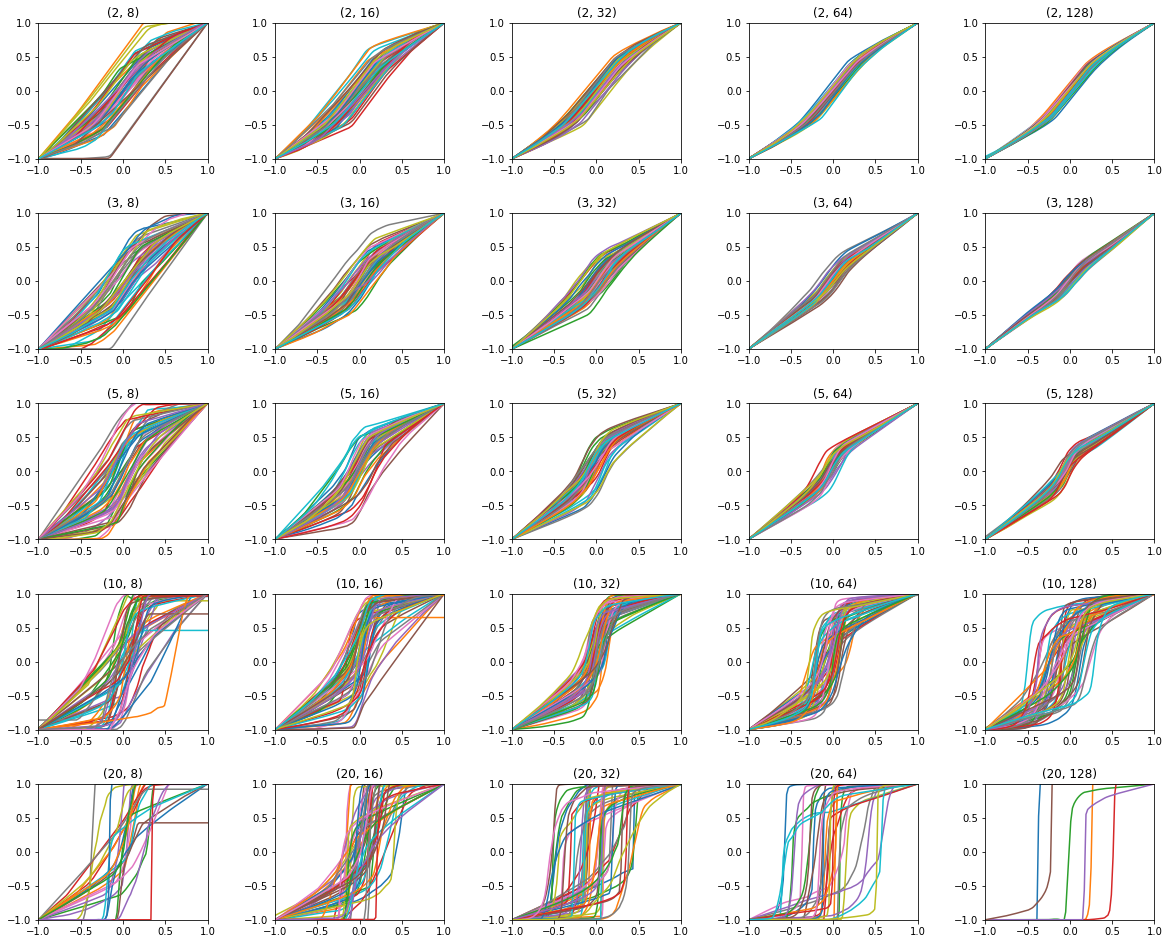

In [76]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plot_idx = 1

# for key, outputs in results.items():
for key in sorted(results.keys()):
    outputs = results[key]
    ax = fig.add_subplot(len(num_l_list), len(hidden_s_list), plot_idx)

    for output in outputs:
        ax.plot(in_betw.numpy(), output.numpy())
    ax.set_ylim(-1,1)
    ax.set_xlim(-1,1)
    ax.set_title(key)
    plot_idx+=1

In [65]:
value_zero = {}

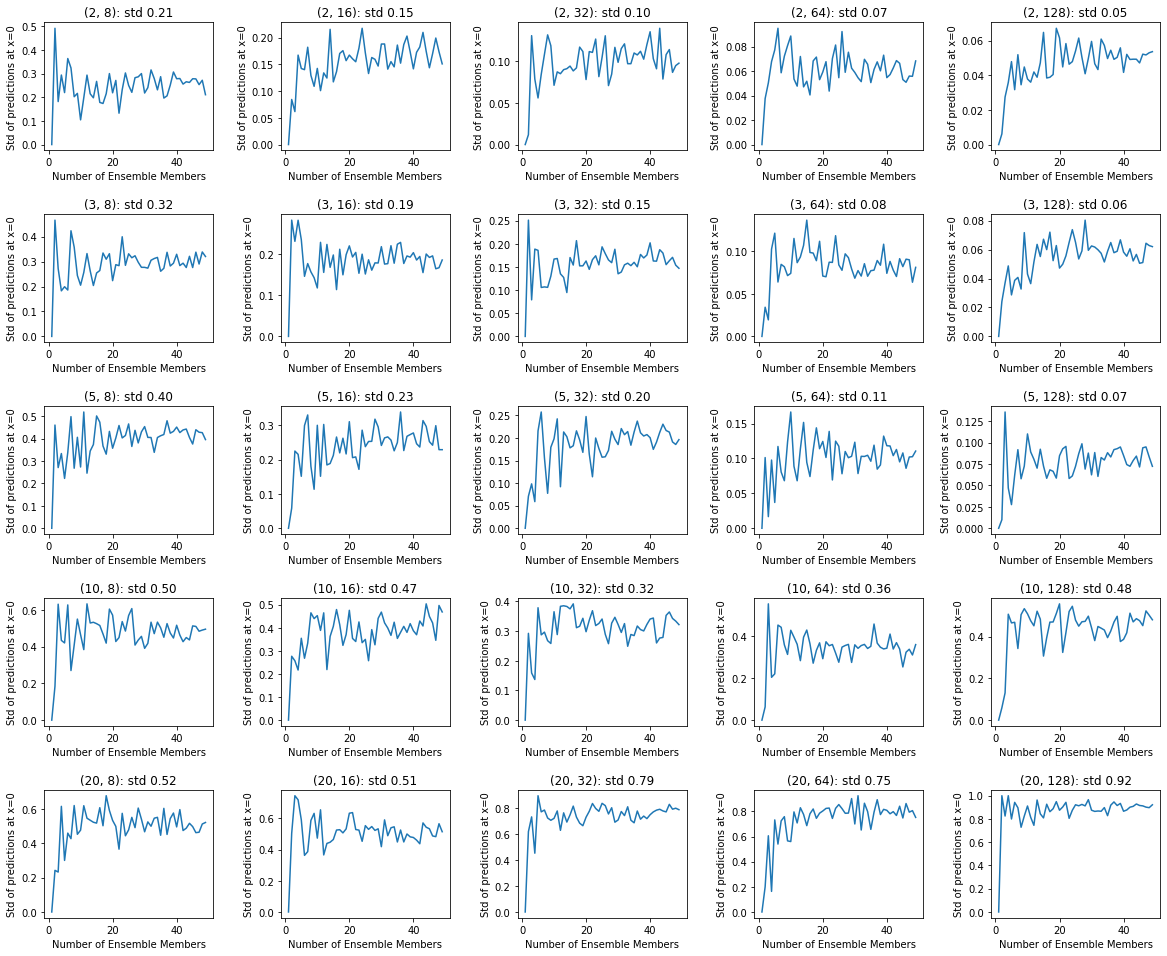

In [77]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
plot_idx = 1

# for key,nets in saved_models.items():
for key in sorted(saved_models.keys()):
    nets = saved_models[key]
    with torch.no_grad():
        f_0 = np.array([x(torch.tensor([0.0])).numpy() for x in nets if x is not None])
    means = []
    stds = []
    for i in range(len(nets)):
        subset_f_0 = f_0[np.random.choice(f_0.shape[0], size=i),:]
        means.append(np.mean(subset_f_0))
        stds.append(np.std(subset_f_0))
#         print('{0} members | mean: {1:.2f}, std: {2:.2f}'.format(i, np.mean(subset_f_0), np.std(subset_f_0)))
    
    value_zero[key] = {'means':means, 'stds':stds}
    ax = fig.add_subplot(len(num_l_list), len(hidden_s_list), plot_idx)
    ax.plot(stds)
    ax.set_title('{0}: std {1:.2f}'.format(key, stds[-1]))
    ax.set_xlabel('Number of Ensemble Members')
    ax.set_ylabel('Std of predictions at x=0')
    plot_idx+=1

### Modify with extra point

In [216]:
lr = 1e-2
thresh = 1e-4
sample_ens = [vanilla_nn(hidden_size=50, num_layers=3).to(device) for x in range(30)]
sample_opts = [optim.Adam(x.parameters(), lr=lr) for x in sample_ens]
extra_point_X = torch.tensor([[-1],[0],[1]]).float()
extra_point_y = torch.tensor([[-1],[0],[1]]).float()
# extra_point_X = torch.tensor([[0]]).float()
# extra_point_y = torch.tensor([[0]]).float()
extra_point_X = torch.tensor(np.concatenate([np.linspace(-10, -1, 100), np.linspace(1, 5, 200)]).reshape(-1,1)).float()
extra_point_y = torch.sin(extra_point_X)

In [217]:
extra_point_X.shape

torch.Size([300, 1])

In [209]:
ens_200 = deepcopy(sample_ens)

In [218]:
need_training = [i for i in range(len(sample_ens))]
prev_need_training = deepcopy(need_training)
same_list_count = 0

for epoch in tqdm(range(10000)):
    for idx in need_training:
        sample_opts[idx].zero_grad()
        sample_pred = sample_ens[idx](extra_point_X)
        loss = criterion(sample_pred, extra_point_y)
        if loss.item() < thresh:
            print('removing {}'.format(idx))
            need_training.remove(idx)
            continue

        loss.backward()
        sample_opts[idx].step()
    prev_need_training = deepcopy(need_training)
    

removing 6
removing 23
removing 2
removing 7
removing 18
removing 9
removing 29
removing 12
removing 24
removing 13
removing 0
removing 27
removing 19
removing 10
removing 16
removing 3
removing 8
removing 14
removing 15
removing 17
removing 1
removing 20
removing 4
removing 28
removing 21
removing 25
removing 26
removing 22
removing 5



In [133]:
for model in sample_ens:
    print((model(extra_point_X)-extra_point_y)**2)

tensor([[1.1898e-10],
        [2.1338e-11],
        [6.7658e-11]], grad_fn=<PowBackward0>)
tensor([[3.8426e-11],
        [1.6428e-11],
        [2.0124e-10]], grad_fn=<PowBackward0>)
tensor([[3.2063e-11],
        [3.7736e-11],
        [5.1159e-13]], grad_fn=<PowBackward0>)
tensor([[9.9796e-12],
        [9.9527e-11],
        [2.2737e-11]], grad_fn=<PowBackward0>)
tensor([[5.4627e-11],
        [1.4758e-10],
        [5.4627e-11]], grad_fn=<PowBackward0>)
tensor([[1.1511e-12],
        [2.4016e-12],
        [2.7853e-10]], grad_fn=<PowBackward0>)
tensor([[3.3427e-11],
        [1.1511e-10],
        [7.7819e-11]], grad_fn=<PowBackward0>)
tensor([[5.0310e-11],
        [1.9787e-10],
        [5.1159e-11]], grad_fn=<PowBackward0>)
tensor([[2.6890e-11],
        [1.8631e-10],
        [4.5365e-11]], grad_fn=<PowBackward0>)
tensor([[2.2737e-11],
        [7.0882e-11],
        [8.4256e-11]], grad_fn=<PowBackward0>)
tensor([[1.4211e-12],
        [8.3138e-12],
        [1.2790e-11]], grad_fn=<PowBackward0>)

In [181]:
in_betw = torch.linspace(-20,20, 10000).view(-1,1)

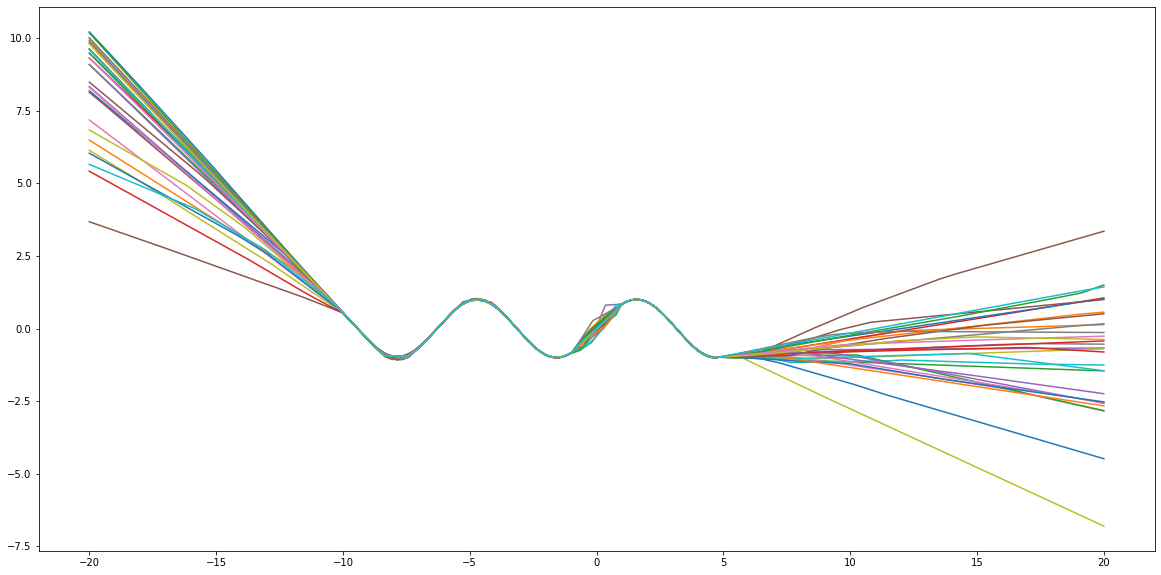

In [220]:
with torch.no_grad():
    for model in sample_ens:
        sample_outputs = model(in_betw)
        plt.plot(in_betw, sample_outputs)
# plt.xlim(-1,1)
# plt.ylim(-1,1)
fig = plt.gcf()
fig.set_size_inches(20,10)

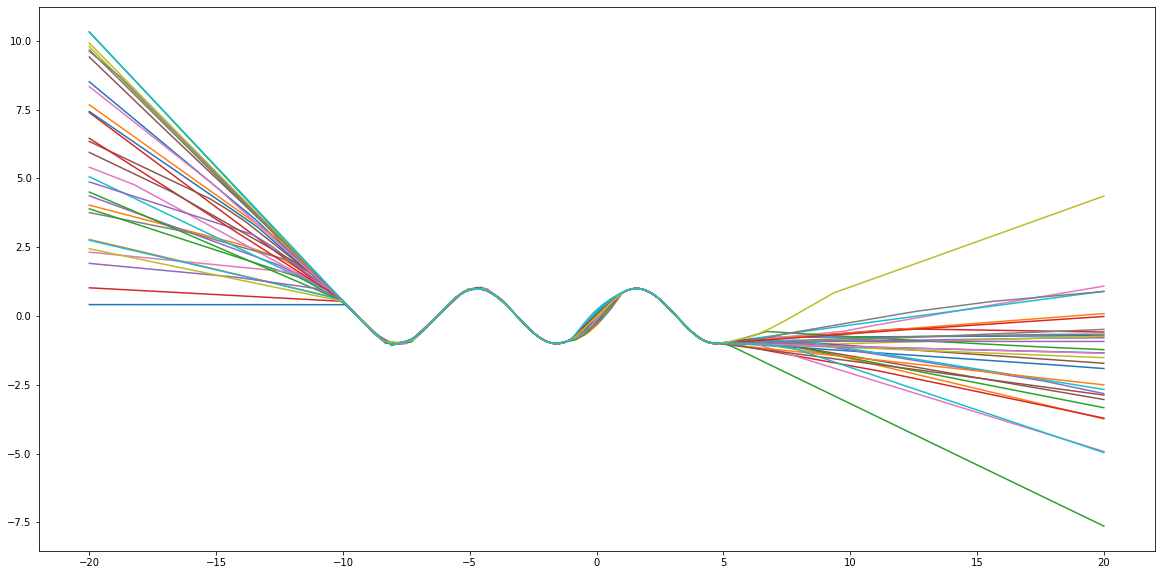

In [221]:
with torch.no_grad():
    for model in ens_200:
        sample_outputs = model(in_betw)
        plt.plot(in_betw, sample_outputs)
# plt.xlim(-1,1)
# plt.ylim(-1,1)
fig = plt.gcf()
fig.set_size_inches(20,10)

In [ ]:
with torch.no_grad():
    for idx in range(len(nets)):
        print(nets[idx](torch.tensor([[-1.0], [1.0]])))

(-1, 1)

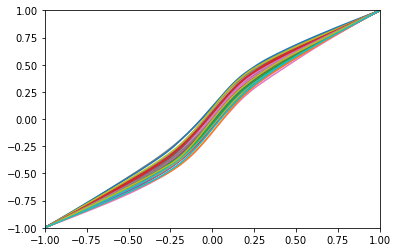

In [68]:
with torch.no_grad():
    outputs = [x(in_betw) for x in nets]
    
for output in outputs:
    plt.plot(in_betw.numpy(), output.numpy())
plt.xlim(-1,1)
plt.ylim(-1,1)

In [69]:
with torch.no_grad():
    f_0 = np.array([x(torch.tensor([0.0])).numpy() for x in nets])
print('mean: {0:.2f}, std: {1:.2f}'.format(np.mean(f_0), np.std(f_0)))

mean: 0.00, std: 0.05


In [70]:
means = []
stds = []
for i in range(num_nets):
    subset_f_0 = f_0[np.random.choice(f_0.shape[0], size=i),:]
    means.append(np.mean(subset_f_0))
    stds.append(np.std(subset_f_0))
    print('{0} members | mean: {1:.2f}, std: {2:.2f}'.format(i, np.mean(subset_f_0), np.std(subset_f_0)))

0 members | mean: nan, std: nan
1 members | mean: -0.03, std: 0.00
2 members | mean: 0.03, std: 0.00
3 members | mean: -0.00, std: 0.02
4 members | mean: -0.01, std: 0.00
5 members | mean: 0.03, std: 0.04
6 members | mean: -0.01, std: 0.03
7 members | mean: 0.02, std: 0.05
8 members | mean: 0.01, std: 0.03
9 members | mean: -0.00, std: 0.03
10 members | mean: 0.00, std: 0.06
11 members | mean: -0.02, std: 0.05
12 members | mean: -0.01, std: 0.05
13 members | mean: -0.01, std: 0.03
14 members | mean: -0.01, std: 0.05
15 members | mean: 0.01, std: 0.03
16 members | mean: 0.00, std: 0.03
17 members | mean: -0.00, std: 0.05
18 members | mean: 0.01, std: 0.04
19 members | mean: 0.01, std: 0.06
20 members | mean: -0.01, std: 0.04
21 members | mean: -0.01, std: 0.05
22 members | mean: -0.01, std: 0.04
23 members | mean: 0.01, std: 0.05
24 members | mean: -0.00, std: 0.04
25 members | mean: 0.00, std: 0.04
26 members | mean: -0.01, std: 0.05
27 members | mean: -0.01, std: 0.04
28 members | mea

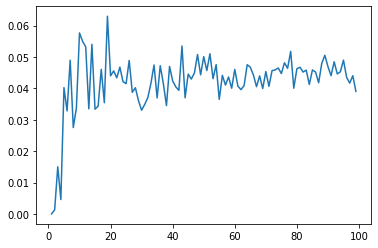

In [71]:
plt.plot(stds)